# Identifying Fraudulent Firms Using XGBoost Classification

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [95]:
df=pd.read_csv('audit_data.csv')
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [96]:
cols_del=['LOCATION_ID','TOTAL','Detection_Risk']
df.drop(cols_del, axis=1, inplace=True)
df.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,6.0,0.6,3.6,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,5.0,0.2,1.0,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.2832,0


### Data Pre-Processing

In [14]:
df.shape

(776, 27)

In [15]:
df.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [38]:
df.isna().sum()

Sector_score     0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      1
Score_MV         0
Risk_D           0
District_Loss    0
PROB             0
RiSk_E           0
History          0
Prob             0
Risk_F           0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
Audit_Risk       0
Risk             0
dtype: int64

In [97]:
df['Money_Value'].fillna((df['Money_Value'].mean()), inplace=True)
df.isna().sum()

Sector_score     0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      0
Score_MV         0
Risk_D           0
District_Loss    0
PROB             0
RiSk_E           0
History          0
Prob             0
Risk_F           0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
Audit_Risk       0
Risk             0
dtype: int64

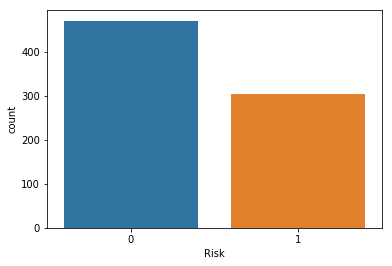

In [98]:
sns.countplot(df['Risk'], label="Count")

In [99]:
X=df.drop(['Risk'],axis=1)


In [41]:
X.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk
Sector_score,1.0,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.17,-0.15,-0.092
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.48,0.15,0.22
Score_A,-0.43,0.5,1.0,0.5,0.25,0.57,0.25,0.24,0.27,0.27,0.21,0.48,0.2,0.089,0.094,0.1,0.18,0.27,0.15,0.72,0.32,0.17,0.2
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.48,0.15,0.22
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.65,0.19,0.89
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.28,0.31,0.3,0.21,0.57,0.2,-0.0047,0.093,0.015,0.2,0.31,0.17,0.9,0.37,0.13,0.21
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.65,0.19,0.89
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,1.0,0.91,0.96,0.19,0.45,0.19,0.13,0.036,0.14,0.2,0.21,0.2,0.5,0.27,0.23,0.22
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.31,0.26,0.26
Risk_C,-0.17,0.14,0.27,0.14,0.22,0.3,0.22,0.96,0.99,1.0,0.22,0.49,0.22,0.15,0.036,0.15,0.22,0.24,0.22,0.55,0.3,0.25,0.25


### Scaling Data

In [100]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X1=X
X=scaling.fit_transform(X)

In [61]:
Y=df['Risk']

# Splitting into training and testing

In [45]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=123)

## Base Model Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
lor= LogisticRegression(random_state=0)
lor.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
from sklearn import model_selection

In [73]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = lor, X = Xtrain, y = ytrain, cv = kfold,scoring=scoring)
acc_logi.mean()

0.9833670033670033

In [74]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
y_predict_r=lor.predict(Xtest)
roc=roc_auc_score(ytest, y_predict_r)
acc = accuracy_score(ytest, y_predict_r)
prec = precision_score(ytest, y_predict_r)
rec = recall_score(ytest, y_predict_r)
f1 = f1_score(ytest, y_predict_r)
results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.969957,0.983367,0.953488,0.964706,0.959064,0.968839


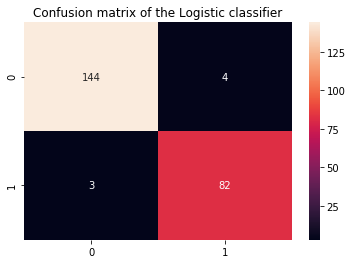

In [75]:
cm_logi = confusion_matrix(ytest, y_predict_r)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

# XGBOOST

## Hyperparameter optimization

In [76]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [77]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [78]:
classifier=xgboost.XGBClassifier()

In [79]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [80]:
random_search.fit(Xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   12.9s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   13.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [81]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.15, max_delta_step=0, max_depth=15,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [82]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.15,
 'max_depth': 15,
 'min_child_weight': 3}

## Model

In [83]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
       learning_rate=0.25, max_delta_step=0, max_depth=15,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [84]:
classifier.fit(Xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
       learning_rate=0.25, max_delta_step=0, max_depth=15,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [85]:
preds=classifier.predict(Xtest)
preds

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

## Testing Cross Validation Score on Test Data

In [56]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,Xtest,ytest,cv=10)

In [86]:
score

array([1.        , 1.        , 0.95833333, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [87]:
score.mean()*100

99.58333333333333

## Model Evaluation

In [89]:
y_predict_xg = classifier.predict(Xtest)
roc=roc_auc_score(ytest, y_predict_xg)
acc = accuracy_score(ytest, y_predict_xg)
prec = precision_score(ytest, y_predict_xg)
rec = recall_score(ytest, y_predict_xg)
f1 = f1_score(ytest, y_predict_xg)

model_results = pd.DataFrame([['XGBoost',acc, score.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.969957,0.983367,0.953488,0.964706,0.959064,0.968839
1,XGBoost,1.000000,0.995833,1.000000,1.000000,1.000000,1.000000


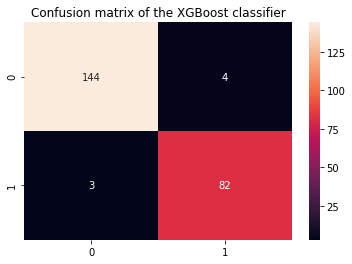

In [91]:
cm_xg = confusion_matrix(ytest, y_predict_xg)
plt.title('Confusion matrix of the XGBoost classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

## Feature Importance

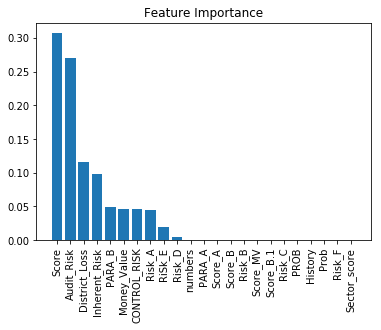

In [102]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X1.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X1.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X1.shape[1]), names, rotation=90)

# Show plot
plt.show()